$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N°1 | Visualización y pre-procesamiento de datos}$$


_Integrantes:_

* _Giovanni Taco_

* _Francisco Ruiz_

### Carga de datasets y librerias 
###### se cargan las librerias y los datasets que serán utilizados para la creación del código

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

df = pd.read_csv("cancer_challenge_cl2.csv",index_col=[0])

### Analisis exploratorio de datos

###### se realiza un análisis exploratorio de la data

In [21]:

df.head() #Retorna las primeras n filas del objeto en cuestión. Su parametro por defecto es 5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,-1001.00,0.12,0.28,0.30,0.15,0.24,0.08,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,0
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,0
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,0
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,0
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,0


In [22]:
df.shape #Numero de filas y columnas

(569, 31)

In [23]:
df.columns #Contenido de las columnas

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [24]:
#De los datos observardos anteriormente, verificamos quienes tienen datos nulos
df.isnull().any()
#Los resultados se obtendran con "True" si algun elemento iterable es nulo

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry               True
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension     True
target    

In [25]:
#Realizamos una descripcion de la data
df.describe() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,566.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,568.00,569.00
mean,14.13,19.29,91.97,651.37,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.64
std,3.52,4.30,24.30,358.40,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.52
min,6.98,9.71,43.79,-1001.00,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,419.80,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,546.40,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.60,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,5.00


Preprocesamiento

In [26]:
# Recorremos la informacion segun la categoria y caracteristicas numericas
for col in df.columns:
  print(col, ":",df[col].nunique()) #Numero de valores unicos en un columna

mean radius : 456
mean texture : 479
mean perimeter : 522
mean area : 539
mean smoothness : 474
mean compactness : 537
mean concavity : 537
mean concave points : 542
mean symmetry : 430
mean fractal dimension : 499
radius error : 540
texture error : 519
perimeter error : 533
area error : 528
smoothness error : 547
compactness error : 541
concavity error : 533
concave points error : 507
symmetry error : 498
fractal dimension error : 545
worst radius : 457
worst texture : 511
worst perimeter : 514
worst area : 544
worst smoothness : 411
worst compactness : 529
worst concavity : 539
worst concave points : 492
worst symmetry : 500
worst fractal dimension : 534
target : 3


In [39]:
df["target"].unique() #Unique values en la columna "target"

array([0, 1], dtype=int64)

In [28]:
#Por lo anterior observamos que existen valores nulos en nuestro array, para ello se purgará esos valores
df = df.dropna(subset=['target'])
df.shape
#Con lo anterior nos cercioramos de que hemos eliminado los valores nulos de nuestra columna "target"

(569, 31)

In [29]:
# Ahora debemos limitar los valores de nuestro array con 0 y 1 para indicar si hay o no existencia de cancer
df[df["target"]==5]=1 #Reemplazamos 5 con 1, donde 1 significa cancer y 0 no hay cancer.
df["target"].unique() #Confirma los valores correctos unicos de la columna "target"

array([0, 1], dtype=int64)

In [30]:
# Por lo anterior, se puede entender de que hayan valores nulos en nuestros datos
df.isnull().any().sum() 

2

In [31]:
#Por ende se observan que hay algunos datos en nuestro archivo que no tienen valores, por ende
#dificultarian el procesamiento de los mismos
df=df.dropna().reset_index(drop=True) #Por lo anterios, soltamos los valores nuelos y eliminamos la antigua indexacion y usamos una nueva.
df.isnull().any().sum() #Confirmamos que ya no hay valores nulos

0

**Visualizacion de datos**
###### Se muestran gráficos con distribución de la varible, matriz de relaciones y diagramas de cajas y bigotes

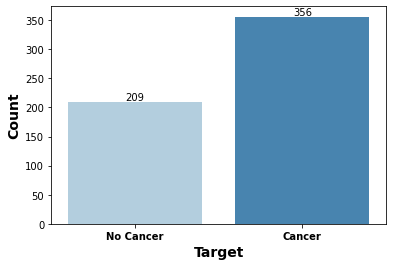

In [32]:
x = df.drop(["target"],axis=1) #Definimos nuestro eje x como las columnas diferentes a la columna "target"
y = df["target"] #y es el "target"
     

#Graficamos los valores target
sns.countplot(data=df, x='target', palette="Blues") #Mostramos la cantidad de observaciones hechas en cada categoria usando barras
plt.xlabel('Target', fontsize=14, weight='bold') #Parametros de x
plt.ylabel('Count', fontsize=14, weight='bold') #Parametros de y
plt.xticks(ticks=[0, 1], labels=['No Cancer', 'Cancer'], weight='bold') #Definimos entre 0 y 1 a las etiquetas de No Cancer y Cancer, respectivamente

# Añadimos anotaciones a cada barra con el numero exacto de casos
for bar in plt.gca().containers:
    label = [f"{int(h.get_height())}" for h in bar] 
    plt.bar_label(bar, labels=label, label_type='edge') 
#Finalmente mostramos los valores
plt.show() 

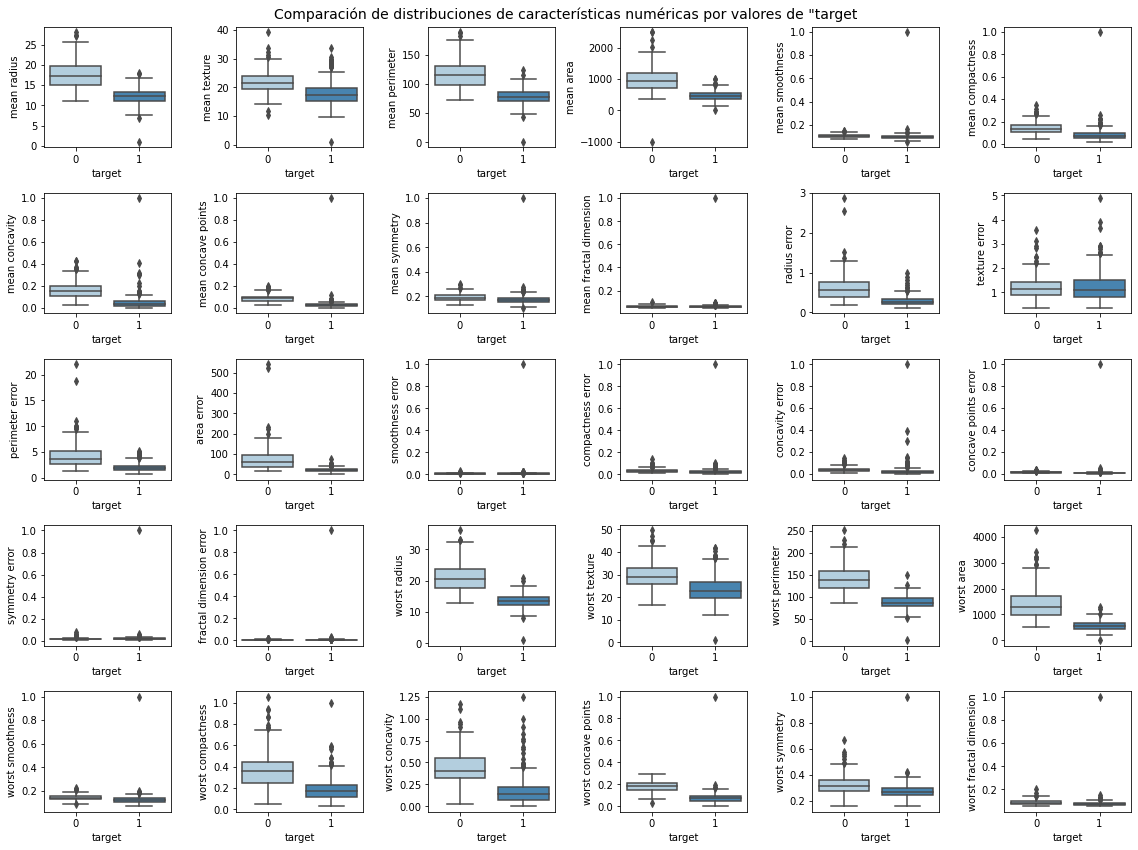

In [33]:
## Definimos la lista de características numéricas.
# Definimos el tamaño de la figura.
plt.figure(figsize=(16, 12))


plt.suptitle('Comparación de distribuciones de características numéricas por valores de "target', fontsize=14)

# Para desarrollar nuestros sub graficos, definiremos un subgrafico
for i,feature in enumerate(x.columns):
    ax = plt.subplot(5, 6, i+1) #Creamos una matriz de 5x6 para los 30 datos correspondientes al target
    sns.boxplot(x='target', y=feature, data=df, palette="Blues", ax=ax)
    ax.set_xlabel('target', fontsize=10)
    ax.set_ylabel(feature, fontsize=10)

# Ajustamos el diseño y ploteamos
plt.tight_layout() #Sin esta linea se ve todo ajustado y no se observa bien
plt.show()

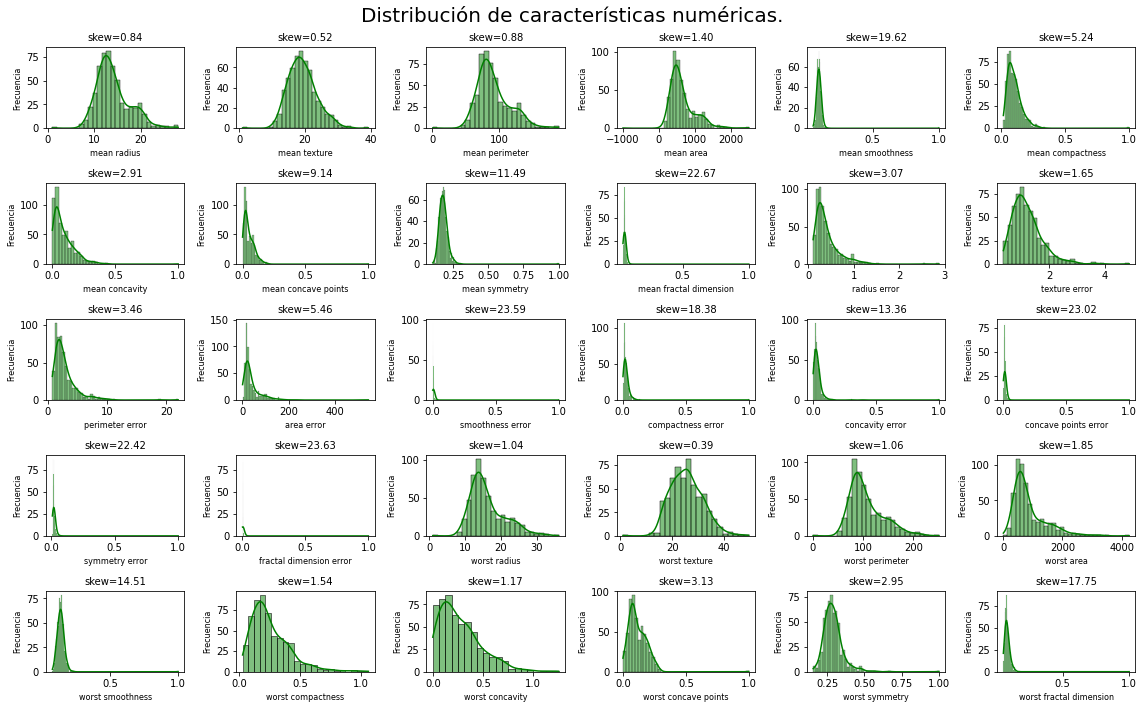

In [34]:
# Ahora buscaremos la caracteristicas de distribucion de los datos
plt.figure(figsize = (16, 10))
plt.suptitle('Distribución de características numéricas.', fontsize=20)

# Para desarrollar nuestros sub graficos, definiremos un subgrafico
for i,feature in enumerate(x.columns):
  ax = plt.subplot(5, 6, i+1)
  #A diferencia del inciso anterior debemos mostrar los valores de las columnas excluyendo a la columna "target"
  sns.histplot(df[feature], color='green', kde=True, ax=ax)
  #Ahora como característica adicional vamos a mostrar por cada grafico como varía la asimetría de los datos
  #Calculamos la asimetría de nuestros datos
  ax.set_title(f"skew={df[feature].skew():.2f}", fontsize=10) 
  #Mostramos los datos de cada columna en el grafico
  ax.set_xlabel(feature, fontsize=8)
  ax.set_ylabel('Frecuencia', fontsize=8)
    
# Ajustamos el diseño y ploteamos
plt.tight_layout() #Sin esta linea se ve todo ajustado y no se observa bien
plt.show()

#  Observando los graficos obtenido se puede concluir que se observa que la mayoría de las variables predictoras se distribuyen normalmente correspondiendo a la forma de la campana de Gauss

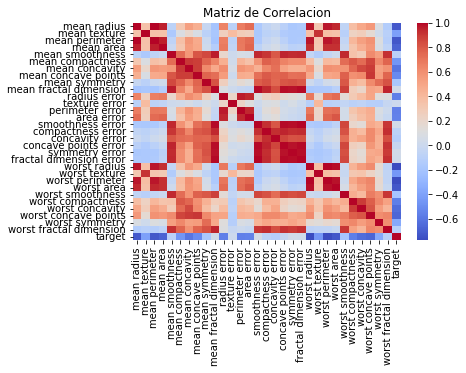

In [35]:
#Creamos la matriz de Correlacion 
#Primero debemos calcular la correlacion de los datos
corr = df.corr()
#Luego se configura la matriz de correlacion
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')
#Mostramos el mapa
plt.title('Matriz de Correlacion')
plt.show()

In [36]:
#Ahora debemos normalizar nuestra data en valores de 0 a 1
normalized_x = (x-x.min())/(x.max()-x.min()) 
normalized_x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.63,0.25,0.65,0.00,0.07,0.26,0.30,0.15,0.15,0.03,...,0.70,0.34,0.73,0.47,0.10,0.62,0.57,0.27,0.36,0.07
1,0.72,0.44,0.70,0.66,0.03,0.06,0.09,0.07,0.08,0.01,...,0.68,0.46,0.63,0.46,0.06,0.15,0.19,0.19,0.14,0.04
2,0.69,0.53,0.69,0.63,0.06,0.14,0.20,0.13,0.11,0.01,...,0.64,0.51,0.61,0.40,0.08,0.39,0.36,0.24,0.24,0.03
3,0.38,0.51,0.41,0.40,0.09,0.27,0.24,0.11,0.17,0.05,...,0.40,0.53,0.39,0.13,0.15,0.81,0.55,0.26,0.60,0.12
4,0.71,0.35,0.72,0.66,0.05,0.12,0.20,0.10,0.08,0.01,...,0.61,0.32,0.60,0.37,0.07,0.17,0.32,0.16,0.09,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0.76,0.56,0.75,0.71,0.06,0.10,0.24,0.14,0.07,0.01,...,0.70,0.52,0.66,0.48,0.08,0.18,0.33,0.22,0.06,0.02
561,0.71,0.71,0.69,0.65,0.05,0.09,0.14,0.10,0.08,0.01,...,0.65,0.77,0.62,0.41,0.05,0.16,0.26,0.16,0.12,0.01
562,0.58,0.71,0.57,0.53,0.03,0.08,0.09,0.05,0.06,0.01,...,0.51,0.68,0.50,0.26,0.05,0.27,0.27,0.14,0.08,0.02
563,0.72,0.74,0.74,0.65,0.07,0.26,0.35,0.15,0.15,0.02,...,0.71,0.79,0.73,0.43,0.10,0.82,0.75,0.27,0.30,0.07


**LazyPredict model test**

In [37]:
#Ahora utilizaremos LazyPredict para poder observar que modelo es mejor
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y,test_size=.3,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:01<00:00, 21.58it/s]

[LightGBM] [Info] Number of positive: 256, number of negative: 139
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3948
[LightGBM] [Info] Number of data points in the train set: 395, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.648101 -> initscore=0.610704
[LightGBM] [Info] Start training from score 0.610704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.98,0.97,0.97,0.98,0.01
Perceptron,0.98,0.97,0.97,0.98,0.01
LogisticRegression,0.97,0.97,0.97,0.97,0.03
LinearSVC,0.96,0.96,0.96,0.96,0.01
SVC,0.96,0.96,0.96,0.96,0.02
KNeighborsClassifier,0.96,0.95,0.95,0.96,0.03
PassiveAggressiveClassifier,0.96,0.95,0.95,0.96,0.02
AdaBoostClassifier,0.95,0.95,0.95,0.95,0.22
ExtraTreesClassifier,0.95,0.95,0.95,0.95,0.14
